Como as notas estão distribuídas?

Quais são os gêneros dominantes?

Quais gêneros tendem a ter notas mais altas?

Filmes mais votados realmente têm notas maiores?

Houve mudança no padrão das notas ao longo das décadas?

In [2]:
# 1. Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Carregar dataset
df = pd.read_csv("../data/imdb_top_1000.csv")

# Ver primeiras linhas
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


# Distribuição das Notas IMDb

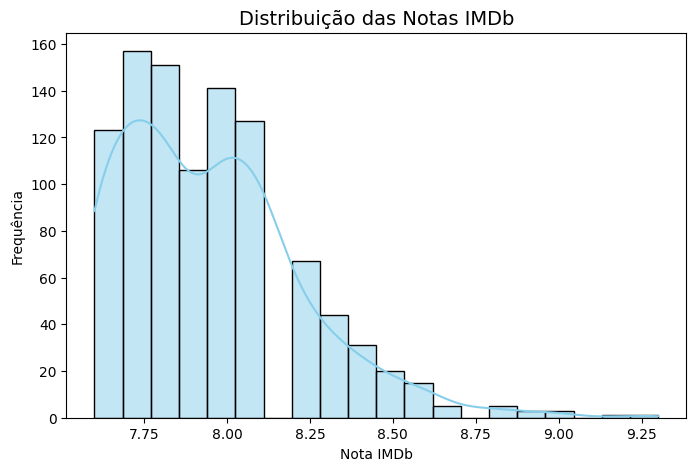

In [3]:
plt.figure(figsize=(8,5))
sns.histplot(df["IMDB_Rating"], bins=20, kde=True, color="skyblue")
plt.title("Distribuição das Notas IMDb", fontsize=14)
plt.xlabel("Nota IMDb")
plt.ylabel("Frequência")
plt.show()

# Gêneros mais frequentes

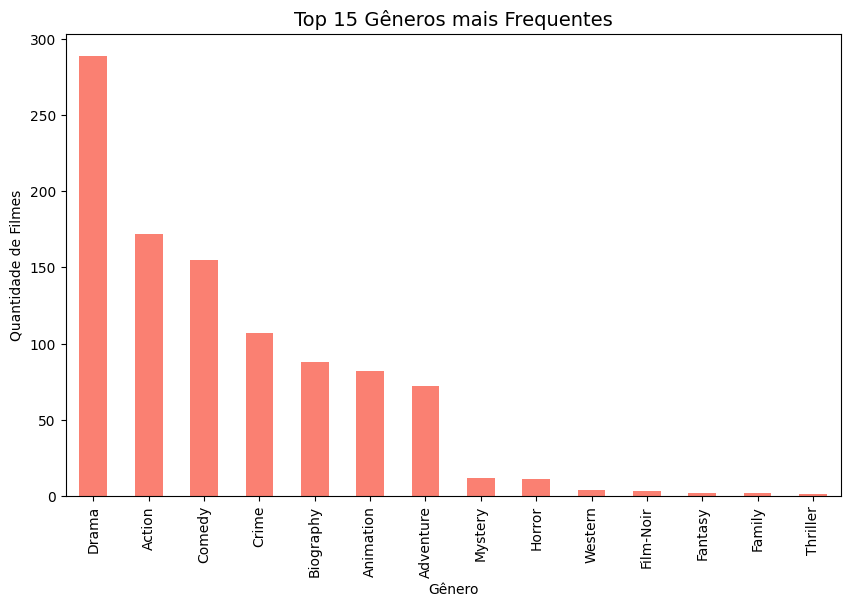

In [4]:
df["Main_Genre"] = df["Genre"].str.split(",").str[0]

plt.figure(figsize=(10,6))
df["Main_Genre"].value_counts().head(15).plot(kind="bar", color="salmon")
plt.title("Top 15 Gêneros mais Frequentes", fontsize=14)
plt.xlabel("Gênero")
plt.ylabel("Quantidade de Filmes")
plt.show()

# Nota Média por Gênero

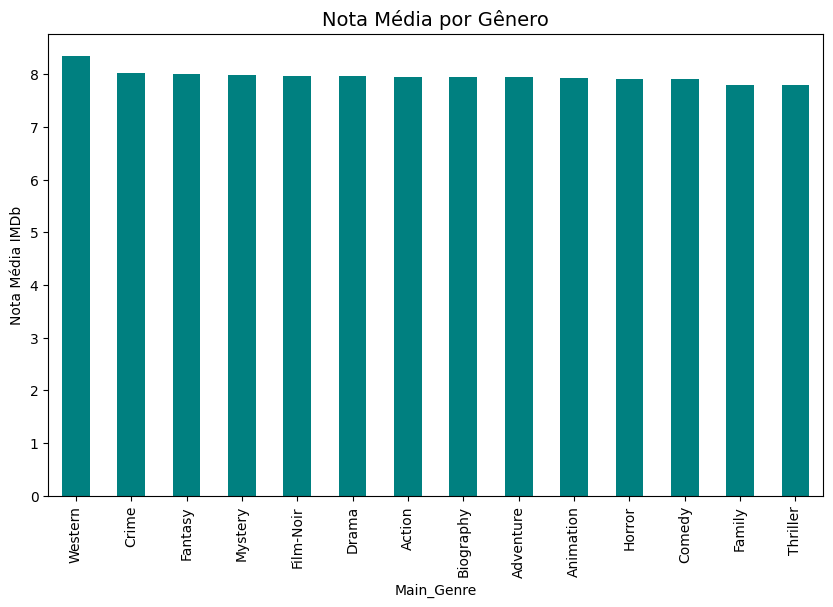

In [5]:
genre_mean = df.groupby("Main_Genre")["IMDB_Rating"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
genre_mean.plot(kind="bar", color="teal")
plt.title("Nota Média por Gênero", fontsize=14)
plt.ylabel("Nota Média IMDb")
plt.show()

# Relação entre Votos e Nota IMDb

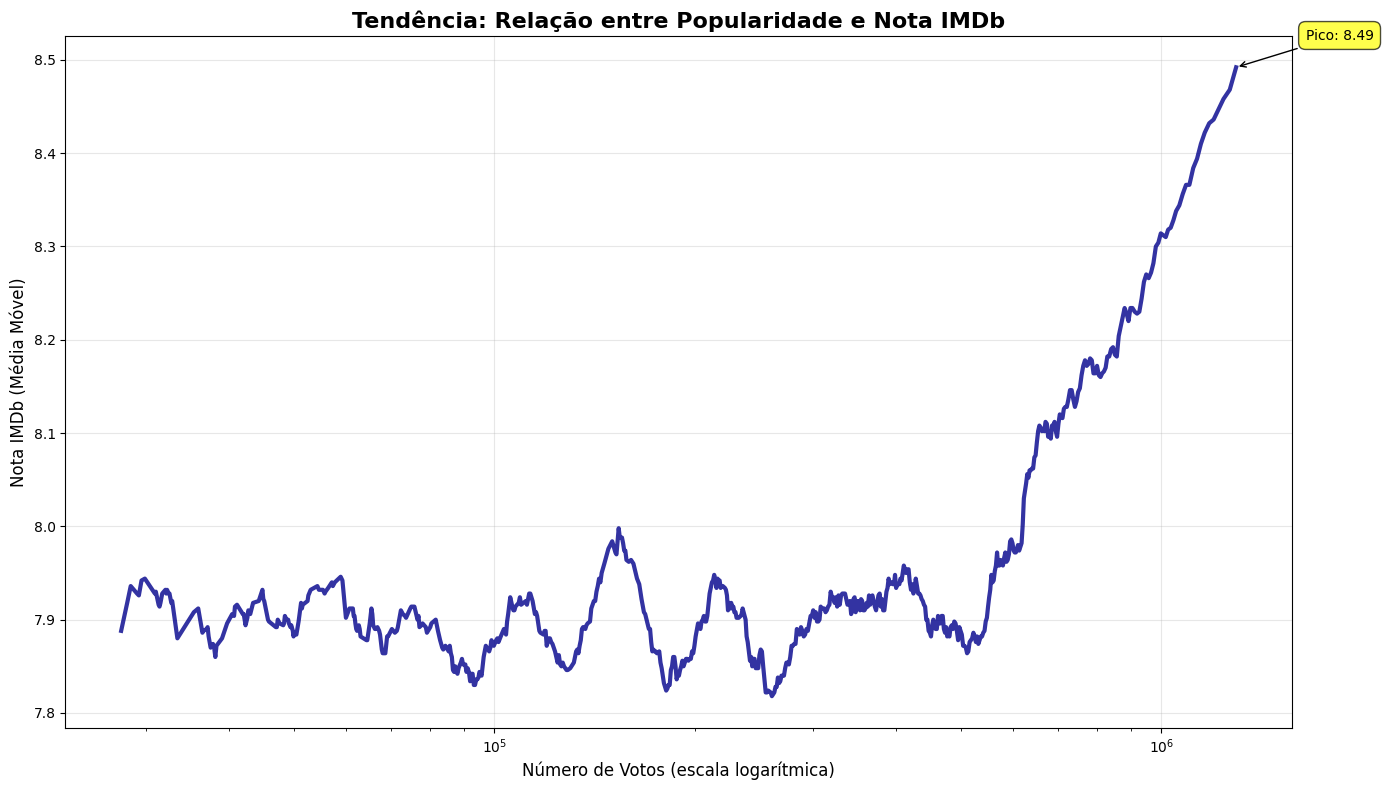

In [16]:
plt.figure(figsize=(14,8))

# Ordenar por número de votos
df_sorted = df.sort_values('No_of_Votes').reset_index(drop=True)

# Calcular média móvel para suavizar a tendência
window_size = 50  # Média de cada 50 filmes
df_sorted['Rating_MA'] = df_sorted['IMDB_Rating'].rolling(window=window_size, center=True).mean()
df_sorted['Votes_MA'] = df_sorted['No_of_Votes'].rolling(window=window_size, center=True).mean()

# Remover valores NaN
df_clean = df_sorted.dropna()

plt.plot(df_clean['Votes_MA'], df_clean['Rating_MA'], 
         linewidth=3, color='darkblue', alpha=0.8)

plt.xscale('log')
plt.title("Tendência: Relação entre Popularidade e Nota IMDb", fontsize=16, fontweight='bold')
plt.xlabel("Número de Votos (escala logarítmica)", fontsize=12)
plt.ylabel("Nota IMDb (Média Móvel)", fontsize=12)
plt.grid(True, alpha=0.3)

# Adicionar anotações nos pontos interessantes
max_rating_idx = df_clean['Rating_MA'].idxmax()
plt.annotate(f'Pico: {df_clean.loc[max_rating_idx, "Rating_MA"]:.2f}', 
             xy=(df_clean.loc[max_rating_idx, 'Votes_MA'], df_clean.loc[max_rating_idx, 'Rating_MA']),
             xytext=(50, 20), textcoords='offset points', 
             bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.7),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.tight_layout()
plt.show()

# Boxplot de Notas por Década

/tmp/ipykernel_16842/3734432816.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Decade", y="IMDB_Rating", palette="Set3")


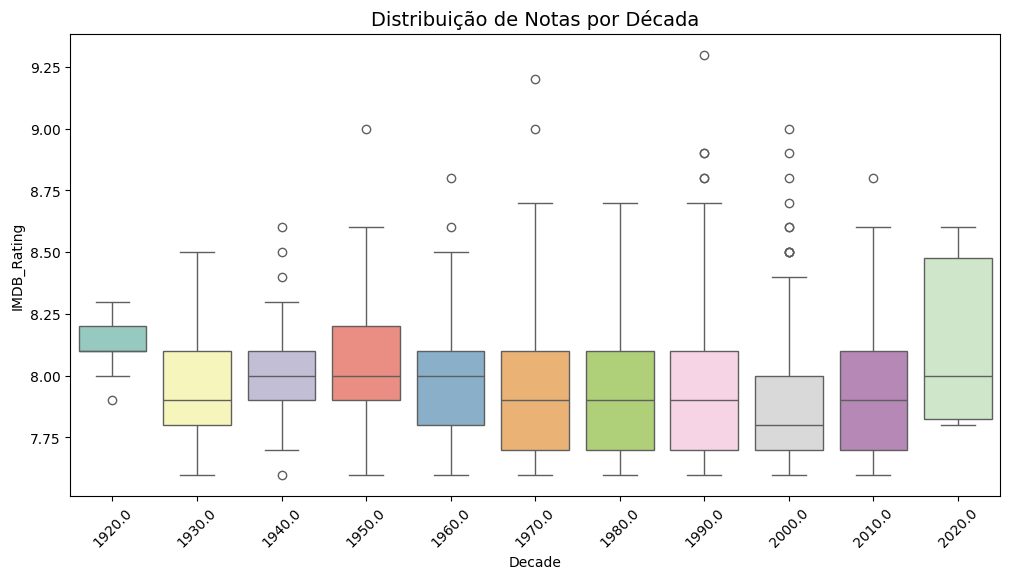

In [17]:
# Extrair ano do campo Released_Year
df["Released_Year"] = pd.to_numeric(df["Released_Year"], errors="coerce")
df = df.dropna(subset=["Released_Year"])
df["Decade"] = (df["Released_Year"] // 10) * 10

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="Decade", y="IMDB_Rating", palette="Set3")
plt.title("Distribuição de Notas por Década", fontsize=14)
plt.xticks(rotation=45)
plt.show()
